In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data.head()

,algorithm,map,attack,goal_x,goal_y,n,time,obstacle_x,obstacle_y,obstacle_time,obstacle_on_time
0,a_star,warehouse,0,-9.0,9.0,1,50.900,NaN,NaN,NaN,NaN
1,a_star,warehouse,0,-9.0,9.0,2,51.200,NaN,NaN,NaN,NaN
2,a_star,warehouse,0,-9.0,9.0,3,50.300,NaN,NaN,NaN,NaN
3,a_star,warehouse,0,-4.5,9.0,1,38.400,NaN,NaN,NaN,NaN
4,a_star,warehouse,0,-4.5,9.0,2,38.101,NaN,NaN,NaN,NaN


In [3]:
print(data['obstacle_on_time'].value_counts())
data[data['obstacle_on_time']==0][['goal_x', 'goal_y']]

obstacle_on_time
1.0    63
0.0     6
Name: count, dtype: int64


,goal_x,goal_y
108,9.0,0.0
109,9.0,0.0
110,9.0,0.0
120,9.0,-4.5
121,9.0,-4.5
122,9.0,-4.5


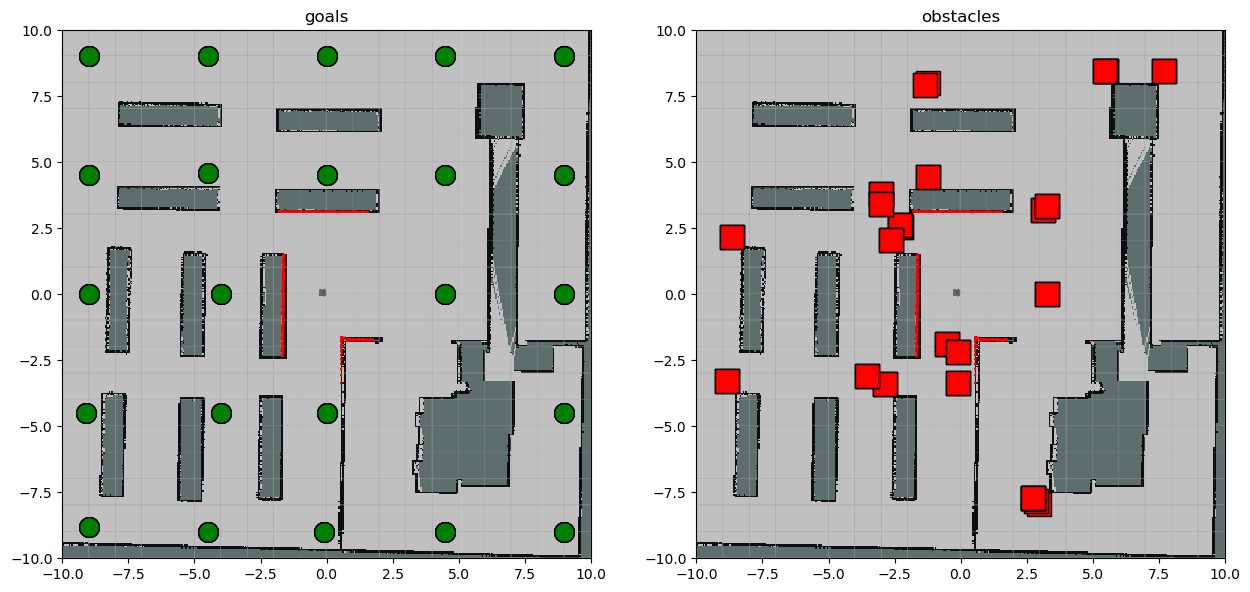

In [8]:
img = plt.imread('warehouse_cropped.png')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
ax[0].imshow(img, extent=[-10, 10, -10, 10])
ax[0].scatter(data['goal_x'], data['goal_y'], c='green', edgecolors='black', s=200)
ax[0].set_title('goals')

ax[1].imshow(img, extent=[-10, 10, -10, 10])
ax[1].scatter(data['obstacle_x'], data['obstacle_y'], c='red', marker='s', edgecolors='black', s=300)
ax[1].set_title('obstacles')
plt.show()

In [5]:
mean_times = pd.DataFrame(data.groupby(['attack', 'goal_x', 'goal_y'])['time'].mean()).reset_index().pivot(index=['goal_x', 'goal_y'], columns='attack', values='time').reset_index()
mean_times['diff'] = mean_times[1] - mean_times[0]
mean_times['diff_pct'] = (mean_times[1] - mean_times[0]) / ((mean_times[1] + mean_times[0]) / 2) * 100
mean_times['distance'] = np.sqrt(np.square(mean_times['goal_x']) + np.square(mean_times['goal_y']))
mean_times

attack,goal_x,goal_y,0,1,diff,diff_pct,distance
0,-9.1,-4.5,42.933333,65.666667,22.733333,41.866176,10.151847
1,-9.0,-8.8,52.666333,57.566333,4.900000,8.890287,12.587295
2,-9.0,0.0,43.100000,58.667000,15.567000,30.593414,9.000000
3,-9.0,4.5,40.866667,64.433333,23.566667,44.761000,10.062306
4,-9.0,9.0,50.800000,79.199667,28.399667,43.691907,12.727922
5,-4.5,-9.0,39.566667,64.400000,24.833333,47.771722,10.062306
6,-4.5,4.6,26.466667,62.433000,35.966333,80.914439,6.435060
7,-4.5,9.0,38.267000,65.900333,27.633333,53.055660,10.062306
8,-4.0,-4.5,24.133333,50.533667,26.400333,70.714863,6.020797
9,-4.0,0.0,23.733667,35.833667,12.100000,40.626294,4.000000


In [6]:
print(mean_times['diff'].mean())
mean_times['diff_pct'].mean()

18.654304347826088


37.19910722230972

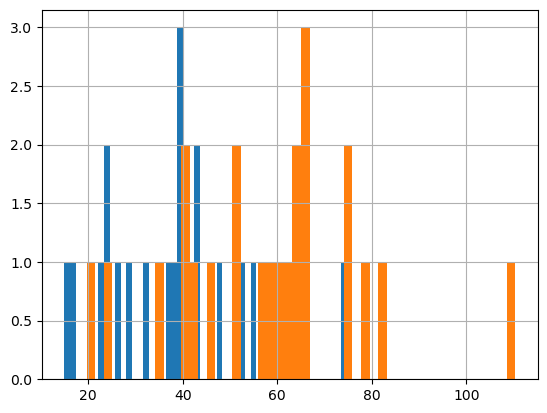

In [7]:
mean_times[0].hist(bins=50)
mean_times[1].hist(bins=50)